In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('bigmart_train.csv')
df_test=pd.read_csv('bigmart_test.csv')

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_test.shape

(5681, 11)

In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# combine train & test datasets to perform EDA
df_train['source']='train'
df_test['source']='test'

In [8]:
data=pd.concat([df_train,df_test],ignore_index=True)

In [9]:
data.shape

(14204, 13)

In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [15]:
# calculate outlet_age
data["Outlet_Age"]=2025-data["Outlet_Establishment_Year"]

In [16]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [18]:
data["Outlet_Size"].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [19]:
data["Outlet_Size"].mode()[0]

'Medium'

In [20]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [21]:
data["Item_Weight"].max()

21.35

In [22]:
data["Item_Weight"].min()

4.555

In [23]:
data["Item_Weight"].mean()

12.792854228644284

In [24]:
data["Item_Weight"].value_counts()

Item_Weight
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: count, Length: 415, dtype: int64

In [25]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

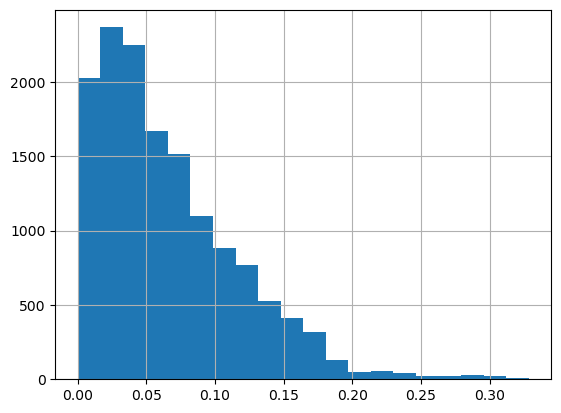

In [26]:
# plot a histogram to reveal the item visibility
data['Item_Visibility'].hist(bins=20)
plt.show()

In [27]:
# check outliers in Item_Visibility
Q1=data['Item_Visibility'].quantile(0.25)
Q3=data['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1

In [28]:
IQR

0.06700157100000001

In [29]:
# remove outliers
data_cleaned=data.query('(@Q1-1.5*@IQR)<=Item_Visibility<=(@Q3+1.5*@IQR)')

In [30]:
data_cleaned.shape

(13943, 14)

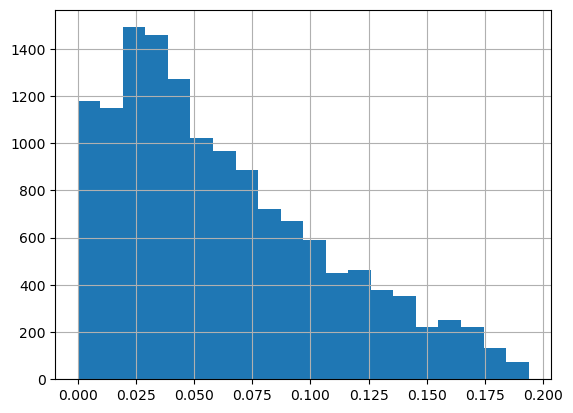

In [31]:
data_cleaned['Item_Visibility'].hist(bins=20)
plt.show()

In [32]:
# modify the item visibility by converting the numerical values into categories law visibility, Visibility & high visibility
data_cleaned['Item_Visibility_Bins']=pd.cut(data_cleaned['Item_Visibility'],[0.000,0.065, 0.130, 0.200],
                                    labels=['Low Viz', 'Viz', 'High Viz'])

In [33]:
data_cleaned['Item_Visibility_Bins'].value_counts()

Item_Visibility_Bins
Low Viz     7363
Viz         4283
High Viz    1418
Name: count, dtype: int64

In [34]:
data_cleaned['Item_Visibility_Bins'].isna().sum()

879

In [35]:
data_cleaned['Item_Visibility_Bins']=data_cleaned['Item_Visibility_Bins'].fillna('Low Viz')

In [36]:
data_cleaned["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8352
Regular    4721
LF          506
reg         190
low fat     174
Name: count, dtype: int64

In [37]:
data_cleaned["Item_Fat_Content"]=data_cleaned["Item_Fat_Content"].replace(['low fat','LF'],'Low Fat')
data_cleaned["Item_Fat_Content"]=data_cleaned["Item_Fat_Content"].replace(['reg'],'Regular')

In [38]:
# initialize the label encoder
le=LabelEncoder()

In [39]:
# transform Item_Fat_Content
data_cleaned["Item_Fat_Content"]=le.fit_transform(data_cleaned["Item_Fat_Content"])

In [40]:
# transform Item_Visibility_Bins
data_cleaned["Item_Visibility_Bins"]=le.fit_transform(data_cleaned["Item_Visibility_Bins"])

In [41]:
data_cleaned["Item_Visibility_Bins"].value_counts()

Item_Visibility_Bins
1    8242
2    4283
0    1418
Name: count, dtype: int64

In [42]:
# transform Outlet_Size
data_cleaned["Outlet_Size"]=le.fit_transform(data_cleaned["Outlet_Size"])

In [43]:
# transform Outlet_Location_Type
data_cleaned["Outlet_Location_Type"]=le.fit_transform(data_cleaned["Outlet_Location_Type"])

In [44]:
data_cleaned["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [45]:
data_cleaned.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Age',
       'Item_Visibility_Bins'],
      dtype='object')

In [46]:
outlet_type_dummy=pd.get_dummies(data_cleaned["Outlet_Type"]).astype('int')
outlet_type_dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [47]:
data_cleaned['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [48]:
data_cleaned['Item_Identifier'].value_counts()

Item_Identifier
FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: count, Length: 1559, dtype: int64

In [49]:
data_cleaned['Item_Identifier_Type']=data_cleaned['Item_Identifier'].apply(lambda x: x[0:2])

In [50]:
data_cleaned['Item_Identifier_Type'].value_counts()

Item_Identifier_Type
FD    9991
NC    2652
DR    1300
Name: count, dtype: int64

In [51]:
data_cleaned['Item_Identifier_Type']=data_cleaned['Item_Identifier_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [52]:
data_cleaned['Item_Identifier_Type'].value_counts()

Item_Identifier_Type
Food              9991
Non-Consumable    2652
Drinks            1300
Name: count, dtype: int64

In [53]:
data_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_Bins,Item_Identifier_Type
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,26,1,Food
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,16,1,Drinks
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,26,1,Food
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,27,1,Food
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,38,1,Non-Consumable


In [54]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13943 entries, 0 to 14203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13943 non-null  object 
 1   Item_Weight                13943 non-null  float64
 2   Item_Fat_Content           13943 non-null  int32  
 3   Item_Visibility            13943 non-null  float64
 4   Item_Type                  13943 non-null  object 
 5   Item_MRP                   13943 non-null  float64
 6   Outlet_Identifier          13943 non-null  object 
 7   Outlet_Establishment_Year  13943 non-null  int64  
 8   Outlet_Size                13943 non-null  int32  
 9   Outlet_Location_Type       13943 non-null  int32  
 10  Outlet_Type                13943 non-null  object 
 11  Item_Outlet_Sales          8375 non-null   float64
 12  source                     13943 non-null  object 
 13  Outlet_Age                 13943 non-null  int64  


In [55]:
data_cleaned.shape

(13943, 16)

In [56]:
data_cleaned.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_Bins            0
Item_Identifier_Type            0
dtype: int64

In [57]:
# apply one-hot-encoding in all columns
data_cleaned=pd.get_dummies(data_cleaned, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Identifier_Type'])

In [58]:
data_cleaned.dtypes

Item_Identifier                         object
Item_Weight                            float64
Item_Visibility                        float64
Item_Type                               object
Item_MRP                               float64
Outlet_Identifier                       object
Outlet_Establishment_Year                int64
Outlet_Size                              int32
Item_Outlet_Sales                      float64
source                                  object
Outlet_Age                               int64
Item_Visibility_Bins                     int32
Item_Fat_Content_0                        bool
Item_Fat_Content_1                        bool
Outlet_Location_Type_0                    bool
Outlet_Location_Type_1                    bool
Outlet_Location_Type_2                    bool
Outlet_Type_Grocery Store                 bool
Outlet_Type_Supermarket Type1             bool
Outlet_Type_Supermarket Type2             bool
Outlet_Type_Supermarket Type3             bool
Item_Identifi

In [119]:
data_cleaned.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [121]:
data_cleaned = data_cleaned.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [123]:
data_cleaned.shape

(13943, 22)

In [125]:
data_cleaned.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Item_Outlet_Sales',
 'source',
 'Outlet_Age',
 'Item_Visibility_Bins',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Item_Identifier_Type_Drinks',
 'Item_Identifier_Type_Food',
 'Item_Identifier_Type_Non-Consumable']

In [127]:
df_train=data_cleaned.loc[data_cleaned["source"]=='train']
df_test=data_cleaned.loc[data_cleaned["source"]=='test']

In [129]:
df_train.shape

(8375, 22)

In [131]:
df_test.shape

(5568, 22)

In [151]:
x_train=df_train.drop(['source','Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)

In [153]:
x_test=df_test.drop(['source','Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)

In [155]:
y_train=df_train.Item_Outlet_Sales
y_test=df_test.Item_Outlet_Sales

In [157]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Visibility_Bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Type_Drinks,Item_Identifier_Type_Food,Item_Identifier_Type_Non-Consumable
0,9.30,0.016047,249.8092,1,26,1,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,1,16,1,0,1,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,1,26,1,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,1,27,1,0,1,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,0,38,1,1,0,0,0,1,0,1,0,0,0,0,1


In [159]:
x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Visibility_Bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Type_Drinks,Item_Identifier_Type_Food,Item_Identifier_Type_Non-Consumable
8523,20.750000,0.007565,107.8622,1,26,1,1,0,1,0,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,1,18,1,0,1,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,1,27,2,1,0,0,0,1,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,1,18,1,1,0,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,1,40,2,0,1,0,0,1,0,0,0,1,0,1,0


In [161]:
from sklearn.model_selection import train_test_split

In [163]:
xtrain, xtest, ytrain, ytest=train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [165]:
linReg=LinearRegression()

In [167]:
linReg.fit(xtrain,ytrain)

LinearRegression()

In [169]:
linReg.coef_

array([-1.87248425e+00, -3.21598143e+02,  1.58761326e+01,  3.69840625e+01,
        1.82233026e+00, -1.43671271e+01, -9.71157332e-01,  9.71157332e-01,
       -3.20944934e+01,  2.37070046e+01,  8.38748873e+00, -1.71783188e+03,
        2.56349852e+02, -9.35436625e+01,  1.55502569e+03,  8.55001330e+00,
        3.50625990e+01, -4.36126123e+01])

In [171]:
linReg.intercept_

-210.7516246039736

In [173]:
y_pred_test=linReg.predict(xtest)

In [175]:
y_pred_test

array([2052.65471626, 3704.91421709, 2887.07602077, ..., 3553.95611574,
       3459.30080205, 1241.14881029])

In [177]:
from math import sqrt
rmse=sqrt(mean_squared_error(y_pred=y_pred_test, y_true=ytest))

In [179]:
rmse

1127.7989451623023

In [201]:
r2_score(y_pred=y_pred_test,y_true=ytest)

0.5631472018191435

In [181]:
# predict the Item_Outlet_Sales of the x_test dataset
y_pred_sales=linReg.predict(x_test)

In [183]:
y_pred_sales

array([1788.74040375, 1519.15870432, 1871.42694958, ..., 1917.70886668,
       3539.4730179 , 1370.88786434])

In [185]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Age'],
      dtype='object')

In [195]:
test_predictions=pd.DataFrame({'Item_Identifier': df_test['Item_Identifier'],
                               'Outlet_Identifier': df_test['Outlet_Identifier'],
                               'Item_Outlet_Sales': y_pred_sales}, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [197]:
test_predictions.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1788.740404
8524,FDW14,OUT017,1519.158704
8525,NCN55,OUT010,1871.426950
8526,FDQ58,OUT017,2601.509796
8527,FDY38,OUT027,5126.409137
